In [ ]:
%pip install torch
%pip install matplotlib
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.0 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] 

In [ ]:
X = torch.linspace(1,50,50).reshape((-1,1))
print(X)

In [22]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype=torch.float)

y = 2*X + 1 + e
print(y)

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])


Text(0, 0.5, 'y')

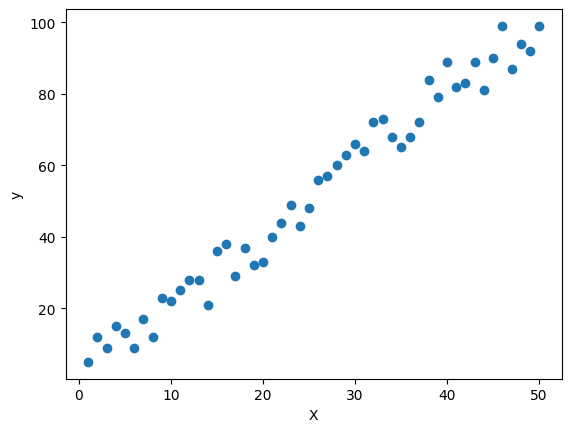

In [23]:
plt.scatter(X.numpy(), y.numpy())
plt.xlabel('X')
plt.ylabel('y')

In [37]:
class Model(nn.Module):

    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
        

In [38]:
torch.manual_seed(50)
model = Model(1,1)
x1 = np.array([X.min(), X.max()])

w1, b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = w1*x1 + b1
print( w1, b1)
print(y1)

0.23604393005371094 -0.8626136779785156
[-0.62656975 10.939583  ]


Text(0, 0.5, 'y')

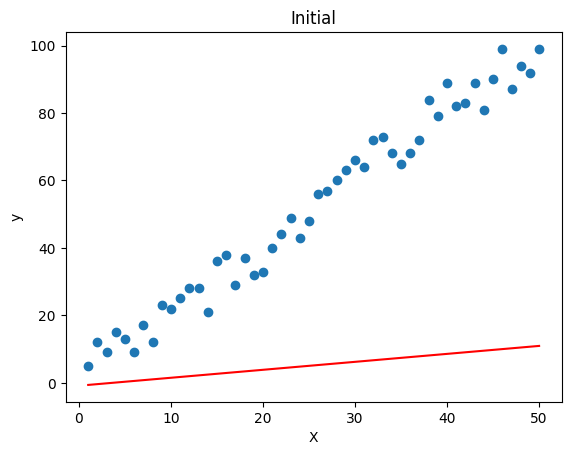

In [39]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')
plt.title("Initial")
plt.xlabel('X')
plt.ylabel('y')

In [40]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)



In [45]:
epoch = 50
losses = []
# print(y)
for i in range(epoch):
    i +=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f"epoch: {i:2} loss: {loss:10.8f} wieght: {model.linear.weight.item(): 10.8f} bias: {model.linear.bias.item(): 10.8f}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1 loss: 22.98397064 wieght:  2.03453231 bias: -0.65109813
epoch:  2 loss: 22.98159027 wieght:  2.03448629 bias: -0.64955705
epoch:  3 loss: 22.97921562 wieght:  2.03444076 bias: -0.64801675
epoch:  4 loss: 22.97684479 wieght:  2.03439498 bias: -0.64647722
epoch:  5 loss: 22.97447777 wieght:  2.03434920 bias: -0.64493841
epoch:  6 loss: 22.97210884 wieght:  2.03430343 bias: -0.64340037
epoch:  7 loss: 22.96974373 wieght:  2.03425789 bias: -0.64186305
epoch:  8 loss: 22.96737862 wieght:  2.03421211 bias: -0.64032650
epoch:  9 loss: 22.96501923 wieght:  2.03416657 bias: -0.63879067
epoch: 10 loss: 22.96266937 wieght:  2.03412104 bias: -0.63725555
epoch: 11 loss: 22.96031189 wieght:  2.03407526 bias: -0.63572121
epoch: 12 loss: 22.95795250 wieght:  2.03402972 bias: -0.63418758
epoch: 13 loss: 22.95560455 wieght:  2.03398418 bias: -0.63265473
epoch: 14 loss: 22.95326233 wieght:  2.03393865 bias: -0.63112259
epoch: 15 loss: 22.95090866 wieght:  2.03389335 bias: -0.62959123
epoch: 16 

[ 1. 50.] [  1.4573164 101.038536 ]


Text(0, 0.5, 'y')

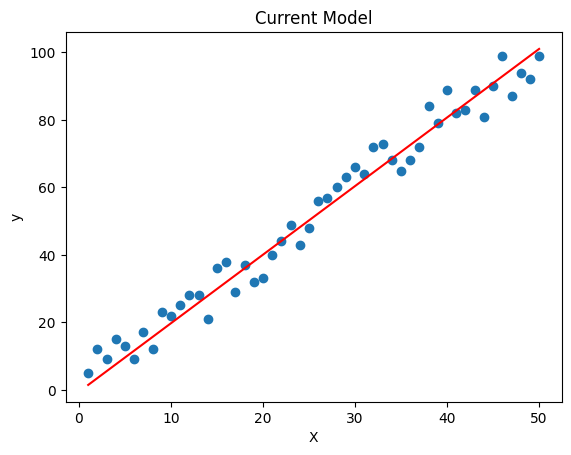

In [48]:
w1 , b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = w1*x1 + b1
print(x1, y1)

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')
plt.title("Current Model")
plt.xlabel("X")
plt.ylabel("y")